# Zeitreihenanalyse am Beispiel von Stromverbrauchs- und Produktionsdaten

## Ziele dieser Übung
- Wie kann ich mir schnell einen Überblick über den Datensatz verschaffen?
- Wie kann ich mir die Korrelation zwischen den Variablen ausgeben lassen?
- Wie kann ich in Python Zeitreihen plotten? 
- Wie kann ich saisonale Einflüsse untersuchen und in Plots darstellen?
- Wie kann ich die Plots exportieren?

In [1]:
# Paket pandas einbinden
import pandas as pd

## Daten einlesen und vorbereiten

In [2]:
# Daten einlesen über pandas Funktion read_csv()
file_path = r'C:\Users\bfues\Downloads\germany_daily.csv'

raw_data = pd.read_csv(file_path)

# Die Daten sind nun in einem pandas data frame gespeichert. 
# Geben Sie sich die Anzahl der Zeilen und Spalten des data frames aus
print(raw_data.shape)

(4383, 5)


In [3]:
# Lassen Sie sich die ersten 8 Zeilen der Rohdaten ausgeben
print(raw_data.head(8))

         Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
3  2006-01-04     1457.217   NaN    NaN         NaN
4  2006-01-05     1477.131   NaN    NaN         NaN
5  2006-01-06     1403.427   NaN    NaN         NaN
6  2006-01-07     1300.287   NaN    NaN         NaN
7  2006-01-08     1207.985   NaN    NaN         NaN


In [4]:
# Lassen Sie sich die letzten 5 Zeilen der Rohdaten ausgeben
print(raw_data.tail(5))

            Date  Consumption     Wind   Solar  Wind+Solar
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156


In [5]:
# Lassen Sie sich die Datentypen der Spalten ausgeben
print(raw_data.dtypes)

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


In [6]:
# Ersten Überblick über den Datensatz verschaffen, funktioniert mit der Funktion describe()
print(raw_data.describe())


       Consumption         Wind        Solar   Wind+Solar
count  4383.000000  2920.000000  2188.000000  2187.000000
mean   1338.675836   164.814173    89.258695   272.663481
std     165.775710   143.692732    58.550099   146.319884
min     842.395000     5.757000     1.968000    21.478000
25%    1217.859000    62.353250    35.179250   172.185500
50%    1367.123000   119.098000    86.407000   240.991000
75%    1457.761000   217.900250   135.071500   338.988000
max    1709.568000   826.278000   241.580000   851.556000


In [7]:
# Überprüfen Sie den Datensatz auf NaN - Wie viele NaN sind in den einzelnen Spalten enthalten?
print(raw_data.isna().sum())

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64


In [8]:
# Zeilen mit mindestens 1x NaN verwerfen. Hierfür vorher eine Kopie der Rohdaten mit copy() anlegen. 
data = raw_data.copy()

# Zeilen mit mindestens 1x NaN verwerfen funktioniert mit dropna, dabei auf die Angabe von inplace achten.
data.dropna(inplace=True)

In [9]:
# Überprüfen durch erneute Ausgabe der NaNs in den Spalten
print(data.isna().sum())

Date           0
Consumption    0
Wind           0
Solar          0
Wind+Solar     0
dtype: int64


In [10]:
# Datumsspalte ist noch nicht im richtigen Format. 
# Soll als Zeitstempel erkannt werden. 
# Das funktioniert über die pandas Funktion to_datetime()
# Dafür die passende Spalte aus dem Dataframe auswählen und anschließend die to_datetime() auf die Spalte anwenden
data['Date'] = pd.to_datetime(data['Date'])

# Überprüfung der Datentypen
print(data.dtypes)


Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object


In [11]:
# Der Zeitstempel soll nun als Index des data frames gesetzt werden
data.set_index('Date', inplace=True)

In [12]:
# Wir können auf einfache Art weitere Spalten mit dem Jahr, Monat oder Tag hinzufügen
# Hierzu greifen wir auf die entsprechenden Attribute des datetime index zu 
data['Year'] = data.index.year
data.head()

Consumption     Wind   Solar  Wind+Solar  Year
Date                                                      
2012-01-01      948.128  227.465   6.587     234.052  2012
2012-01-02     1269.581  207.327   6.574     213.901  2012
2012-01-03     1334.745  473.468  24.679     498.147  2012
2012-01-04     1347.136  499.804  14.681     514.485  2012
2012-01-05     1376.658  523.851   5.071     528.922  2012

In [13]:
# Fügen Sie weitere Spalten mit dem Wochentag und Monat hinzu.
# Der Wochentag entspricht dem Attribut weekday des index, der Monat dem Attribut month
data['Year'] = data.index.year
data['Weekday'] = data.index.weekday
data['Month'] = data.index.month

# Wochentag durchnummeriert von 0-6 (Mo-So)


# Monat durchnummeriert von 1-12


# Ausgabe der ersten Zeilen


In [14]:
# Wochenenden
data['Weekend'] = data['Weekday'] > 5

# Name des Wochentags (Monday, Tuesday, ...)
# Achtung, hier ist day_name() eine Funktion, die den Namen zurückgibt 
# und nicht wie oben ein Attribut von index
data['Weekday Name'] = data.index.day_name()

# Monatsname (January, February, ...)
# Achtung, hier ist month_name() eine Funktion, die den Monatsnamen zurückgibt 
# und nicht wie oben ein Attribut von index
data['Month Name'] = data.index.month_name() 

data.head()

Consumption     Wind   Solar  Wind+Solar  Year  Weekday  Month  \
Date                                                                         
2012-01-01      948.128  227.465   6.587     234.052  2012        6      1   
2012-01-02     1269.581  207.327   6.574     213.901  2012        0      1   
2012-01-03     1334.745  473.468  24.679     498.147  2012        1      1   
2012-01-04     1347.136  499.804  14.681     514.485  2012        2      1   
2012-01-05     1376.658  523.851   5.071     528.922  2012        3      1   

            Weekend Weekday Name Month Name  
Date                                         
2012-01-01     True       Sunday    January  
2012-01-02    False       Monday    January  
2012-01-03    False      Tuesday    January  
2012-01-04    False    Wednesday    January  
2012-01-05    False     Thursday    January

In [15]:
# Korrelationsmatrix ausgeben
corr_matrix = data.corr(numeric_only=True)
print(corr_matrix)

# Was fällt auf? Welche Merkmale korrelieren positiv, welche negativ?
# Würden Sie Merkmale aus der weiteren Analyse ausschließen?

# - Hohe Korrelation zwischen Wind und Wind+Solar (0.92) → logisch, da Wind+Solar die Summe von Wind und Solar enthält.
# - Negative Korrelation zwischen Consumption und Solar (-0.28) → Verbrauch sinkt im Sommer, wenn Solarstrom steigt.
# - Negative Korrelation zwischen Consumption und Weekday (-0.58) → Weniger Verbrauch an Wochenenden.
# - Positive Korrelation zwischen Year und Wind+Solar (0.42) → Anstieg der kombinierten Erzeugung über die Jahre.
# - Schwache Korrelation zwischen Solar und Wind (-0.31) → unabhängige Erzeugungsquellen.

# - Weekday oder Weekend könnten redundant sein → eine Spalte könnte entfernt werden.
# - Wind+Solar ist direkt abhängig von Wind → möglicherweise in der weiteren Analyse redundant.

             Consumption      Wind     Solar  Wind+Solar      Year   Weekday  \
Consumption     1.000000  0.133076 -0.279543    0.027648  0.245311 -0.583504   
Wind            0.133076  1.000000 -0.308832    0.924745  0.347796  0.022162   
Solar          -0.279543 -0.308832  1.000000    0.076394  0.130046 -0.004921   
Wind+Solar      0.027648  0.924745  0.076394    1.000000  0.416641  0.021264   
Year            0.245311  0.347796  0.130046    0.416641  1.000000  0.003345   
Weekday        -0.583504  0.022162 -0.004921    0.021264  0.003345  1.000000   
Month          -0.095879  0.041196 -0.083739    0.009679 -0.000881  0.001802   
Weekend        -0.575273  0.030993 -0.003960    0.030906  0.001148  0.612513   

                Month   Weekend  
Consumption -0.095879 -0.575273  
Wind         0.041196  0.030993  
Solar       -0.083739 -0.003960  
Wind+Solar   0.009679  0.030906  
Year        -0.000881  0.001148  
Weekday      0.001802  0.612513  
Month        1.000000  0.001386  
Weekend

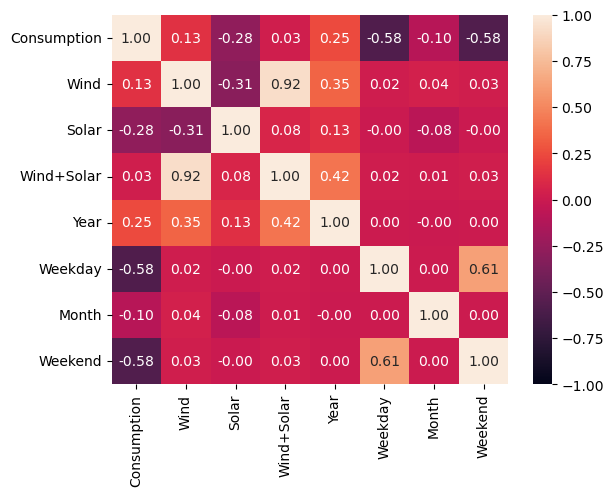

In [16]:
# Anschaulichere Darstellung

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()

# Erkenntnisse? 
# - Die starke Korrelation zwischen Wind und Wind+Solar (0.92) bestätigt die logische Verbindung.
# - Die negative Korrelation zwischen Consumption und Solar (-0.28) deutet auf saisonale Muster hin.
# - Die starke negative Korrelation zwischen Consumption und Weekday (-0.58) zeigt, dass an Wochenenden weniger Strom verbraucht wird.
# - Die positive Korrelation zwischen Year und Wind+Solar (0.42) könnte auf eine steigende Produktion durch erneuerbare Energien über die Jahre hindeuten.
# - Schwache bis keine Korrelation zwischen Solar und Wind (-0.31) → Solar- und Windproduktion sind weitgehend unabhängig voneinander.
# - Eine Korrelation > 0.7 oder < -0.7 zeigt einen starken Zusammenhang → nur Wind und Wind+Solar zeigen eine starke Korrelation.
# - Weekday und Weekend zeigen eine starke negative Korrelation → Hinweis auf Wochenend-Effekt.

#Eine Korrelation > 0.7 oder < -0.7 zeigt einen starken positiven bzw. negativen Zusammenhang.
#Eine Korrelation zwischen 0.3 und 0.7 zeigt eine moderate Verbindung.
#Werte nahe 0 zeigen keine oder nur eine schwache Verbindung.


In [17]:
# Spalten wieder löschen funktioniert über die Funktion df.drop(columns=['Name1', 'Name2'], inplace=True)
# Löschen Sie die Spalten 'Month', 'Year', 'Weekday Name', 'Weekday'
data.drop(columns=['Month', 'Year', 'Weekday', 'Weekday Name'], inplace=True)


# Ausgabe der ersten Zeilen
print(data.head())

            Consumption     Wind   Solar  Wind+Solar  Weekend Month Name
Date                                                                    
2012-01-01      948.128  227.465   6.587     234.052     True    January
2012-01-02     1269.581  207.327   6.574     213.901    False    January
2012-01-03     1334.745  473.468  24.679     498.147    False    January
2012-01-04     1347.136  499.804  14.681     514.485    False    January
2012-01-05     1376.658  523.851   5.071     528.922    False    January


In [18]:
# Durch das Indizieren mit dem Zeitstempel kann man wie wir im letzten Notebook gesehen haben auf einfache Art und Weise auf Einträge eines bestimmten Datums zugreifen.
# Das funktioniert mit der Methode loc['Datum']
# Greifen Sie auf die Werte des Datums '2016-03-15' zu und erzeugen Sie eine Ausgabe
print(data.loc['2016-03-15'])

Consumption    1568.054
Wind            158.489
Solar            35.241
Wind+Solar       193.73
Weekend           False
Month Name        March
Name: 2016-03-15 00:00:00, dtype: object


In [19]:
# Man kann mit loc auch eine Zeitspanne auswählen. Greifen Sie auf den Zeitraum von '2016-03-15' bis 2016-03-20' zu.
print(data.loc['2016-03-15':'2016-03-20'])

            Consumption     Wind    Solar  Wind+Solar  Weekend Month Name
Date                                                                     
2016-03-15     1568.054  158.489   35.241     193.730    False      March
2016-03-16     1560.626  259.235  108.366     367.601    False      March
2016-03-17     1530.473   82.665  157.923     240.588    False      March
2016-03-18     1518.480  134.001  111.766     245.767    False      March
2016-03-19     1313.651  128.629   74.603     203.232    False      March
2016-03-20     1210.452  280.151   63.360     343.511     True      March


In [20]:
# Ein weiteres praktisches Feature ist partial indexing. 
# Was passiert bei data.loc['2016-03']?
print(data.loc['2016-03'])

            Consumption     Wind    Solar  Wind+Solar  Weekend Month Name
Date                                                                     
2016-03-01     1581.822  247.365   47.933     295.298    False      March
2016-03-02     1573.211  359.877   33.769     393.646    False      March
2016-03-03     1562.373  105.489   52.006     157.495    False      March
2016-03-04     1548.866  282.382   74.041     356.423    False      March
2016-03-05     1317.666   84.151   41.606     125.757    False      March
2016-03-06     1223.360  121.344   49.204     170.548     True      March
2016-03-07     1531.428   58.417   72.460     130.877    False      March
2016-03-08     1574.837   73.723   75.801     149.524    False      March
2016-03-09     1563.842  242.100  119.006     361.106    False      March
2016-03-10     1546.814  126.091   96.694     222.785    False      March
2016-03-11     1531.620   93.160   68.225     161.385    False      March
2016-03-12     1320.899   88.706   62.

## Visualisierung

In [21]:
# Bibliothek matplotlib für die Visualisierung einbinden
import matplotlib.pyplot as plt # zum plotten

# weitere Bibliothek für schönere Plots
import seaborn as sns

# Einstellungen um die Standardgröße von Plots, sowie die Schriftgrößen in den Plots zu bestimmen
sns.set(rc={'figure.figsize':(30, 10)})
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22) 
plt.rc('font', size=22)
plt.rc('axes', titlesize=28, labelsize=24)
plt.rc('legend', fontsize=28) 

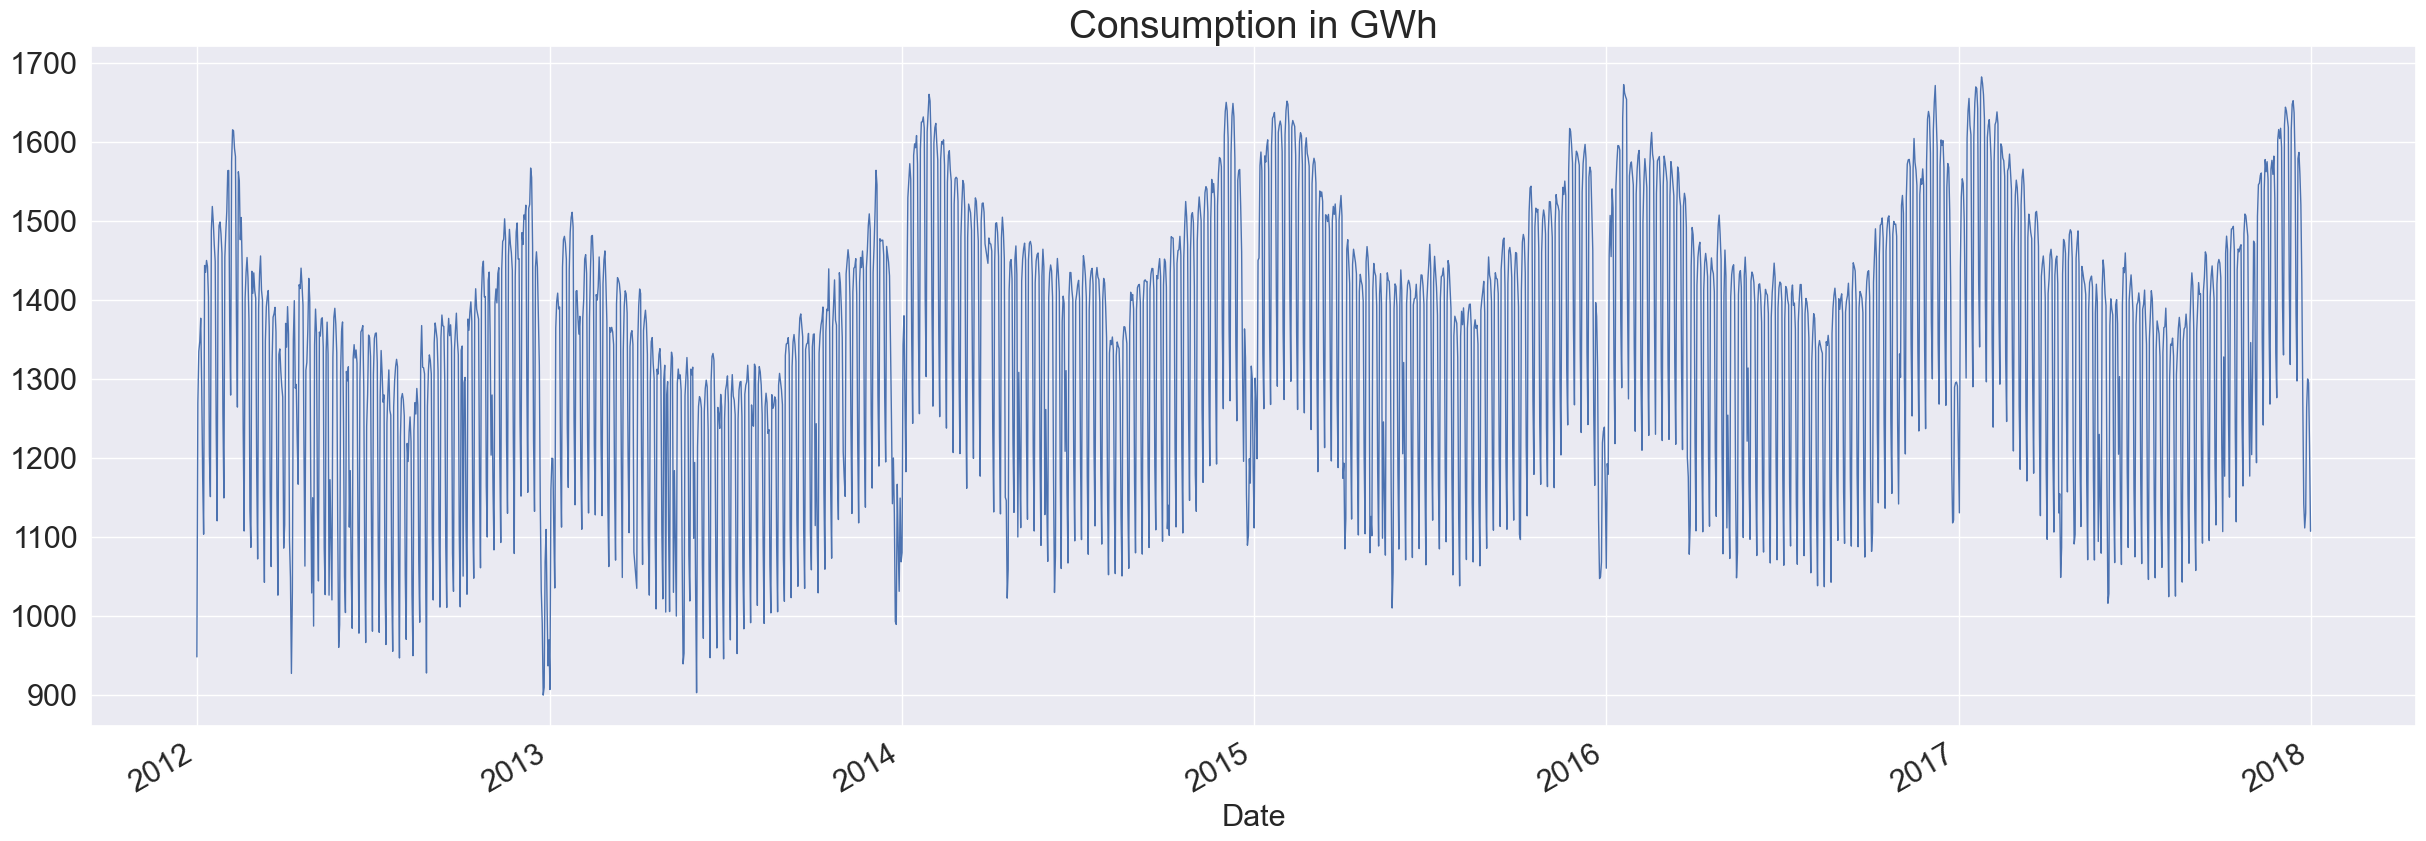

In [22]:
# Plot für den Stromverbrauch

# Linienplot
consumption_plot = data['Consumption'].plot(linewidth=1, title='Consumption in GWh');

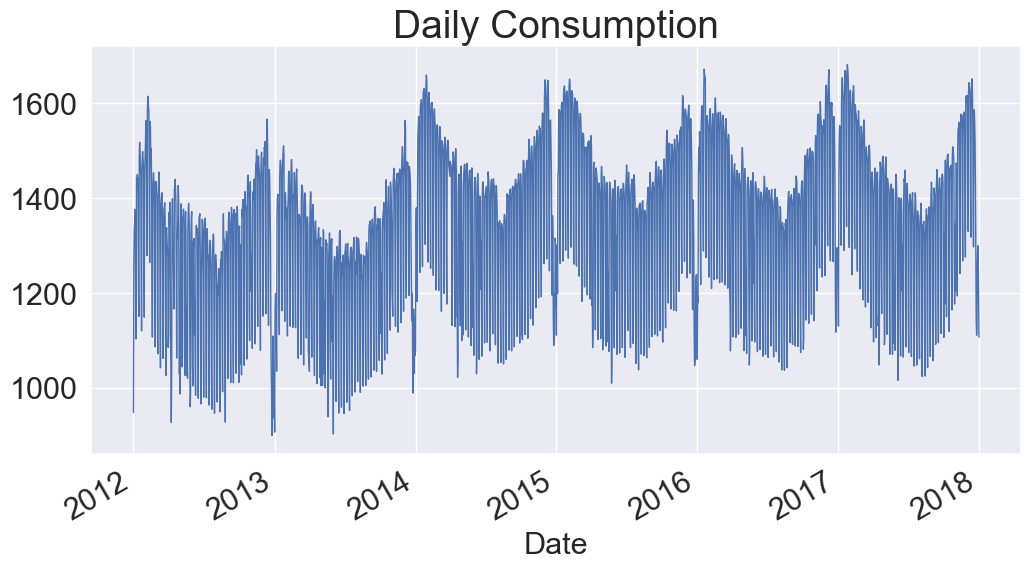

In [23]:
# Plot exportieren funktioniert mit Plotname.figure.savefig()

# Zeile einmalig ausführen
#from google.colab import files

# Speichern der Plots
#consumption_plot.figure.savefig('/content/drive/My Drive/mein_plot.pdf')
fig, ax = plt.subplots(figsize=(12, 6))
data['Consumption'].plot(ax=ax, linewidth=1)
ax.set_title('Daily Consumption')
fig.savefig('boxplots.pdf')

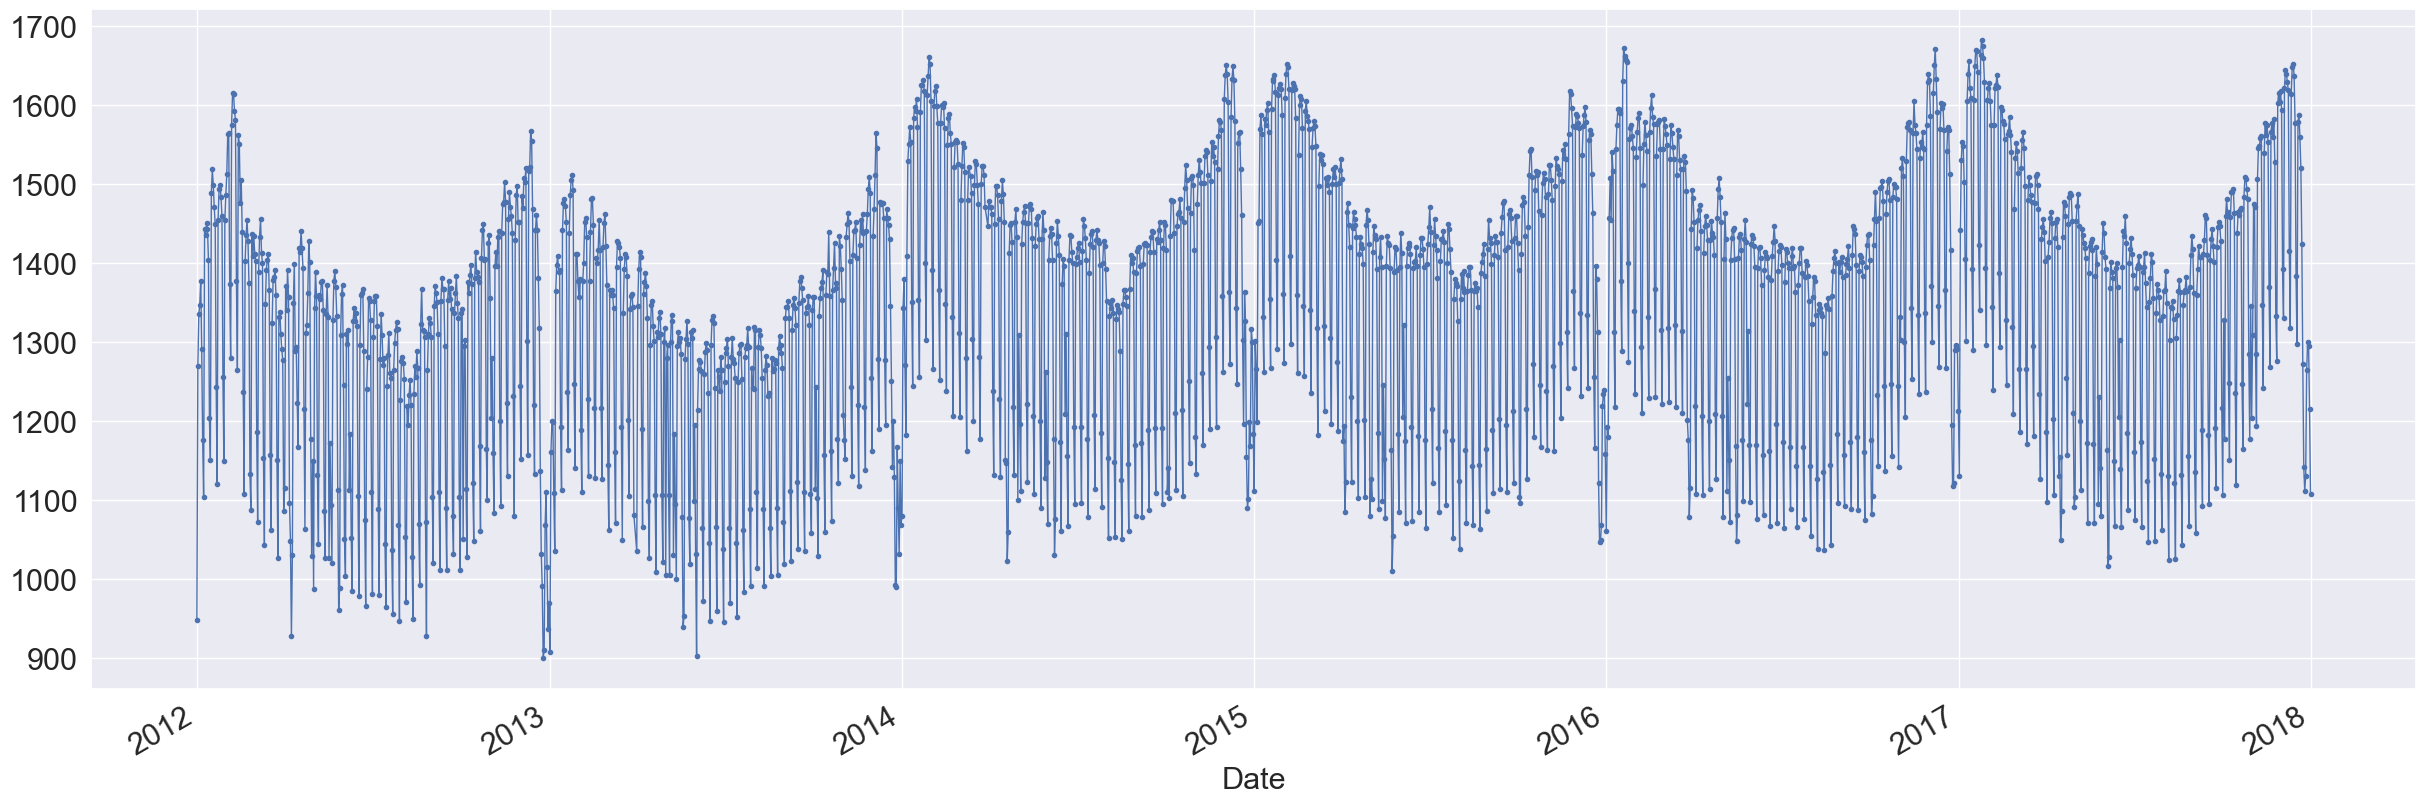

In [24]:
# Linienplot mit speziell definiertem Marker
consumption_plot = data['Consumption'].plot(linewidth=1, marker='.');  
plt.show()

# Was passiert wenn Sie marker='o' oder marker='x' setzen?
#marker='.' → Punkt → kleine, dezente Markierung → gut geeignet für viele Datenpunkte, da wenig Überlappung
#marker='o' → Kreis → gut sichtbar, aber kann bei vielen Punkten überlappen
#marker='x' → Kreuz → vermeidet Überlappungen, da es die Form einer offenen Struktur hat


Eine Übersicht weiterer Marker gibt es hier:
https://matplotlib.org/3.1.1/api/markers_api.html 

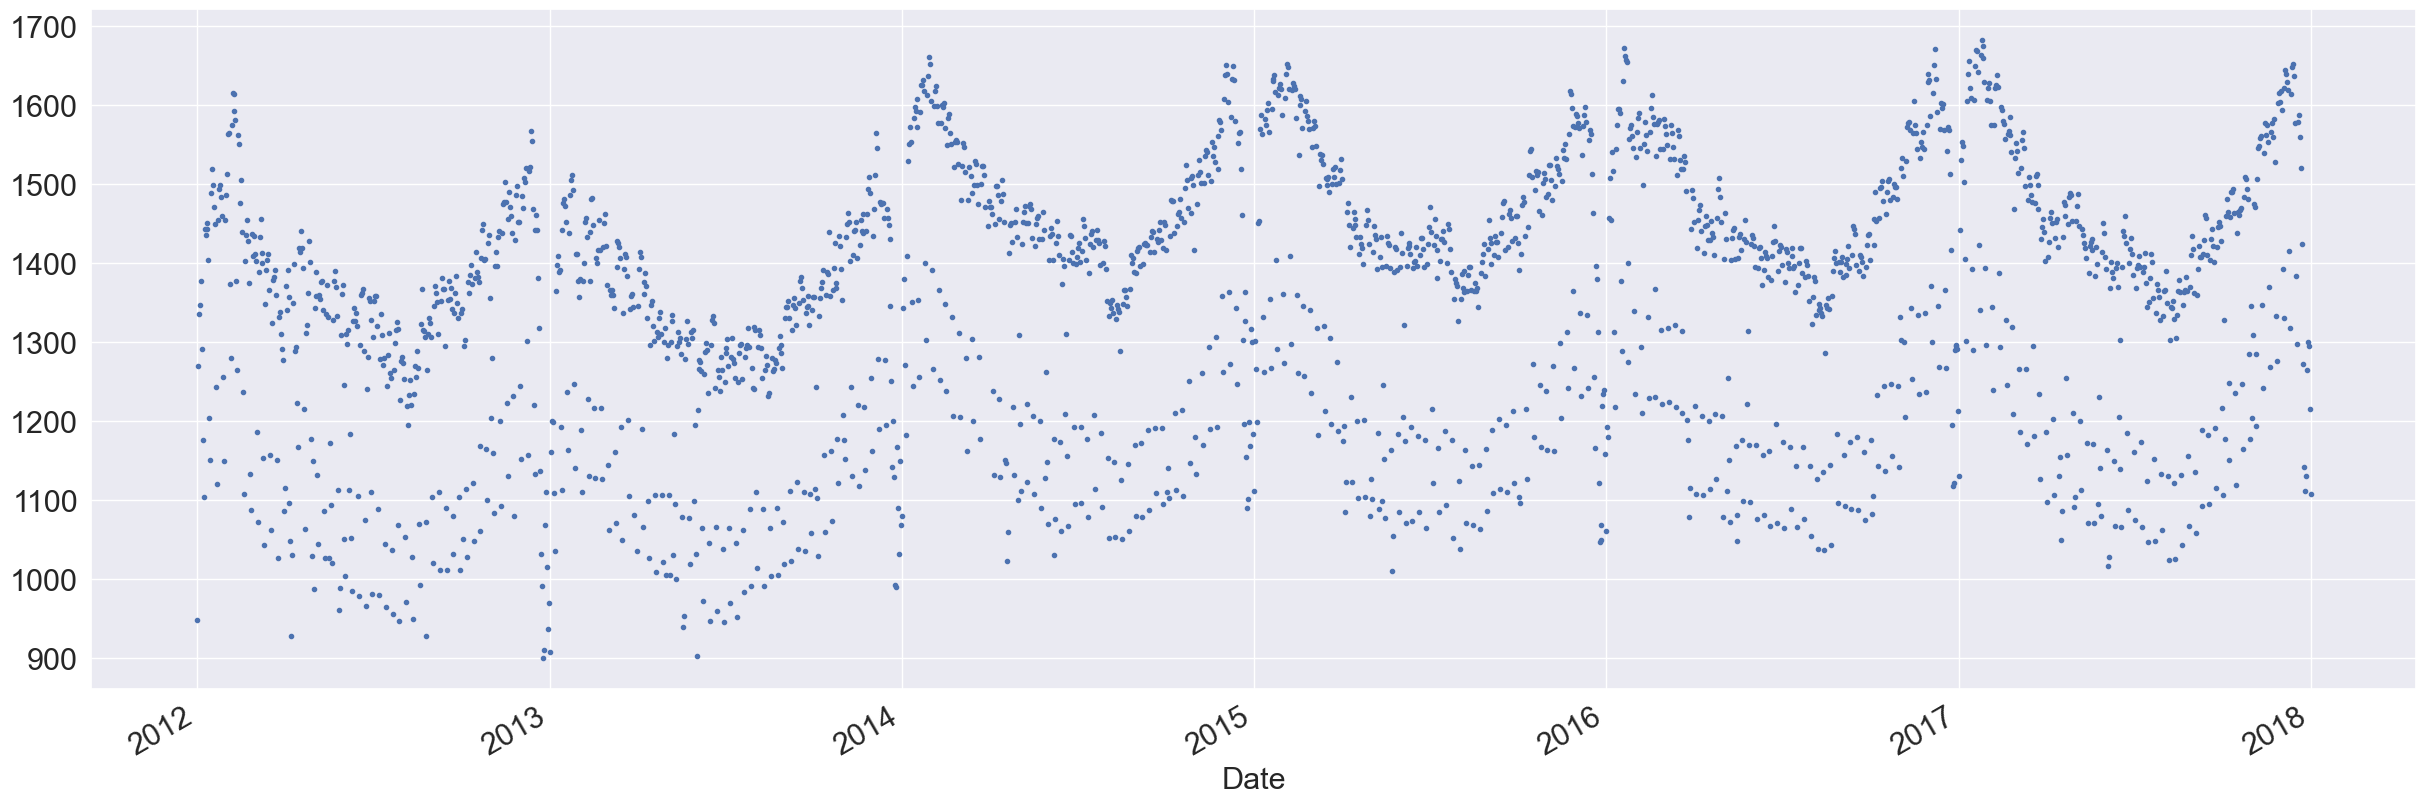

In [25]:
# Plot mit Marker ohne Linie
data['Consumption'].plot(linestyle='', marker='.');  # oder z.B. marker='x', marker='o'

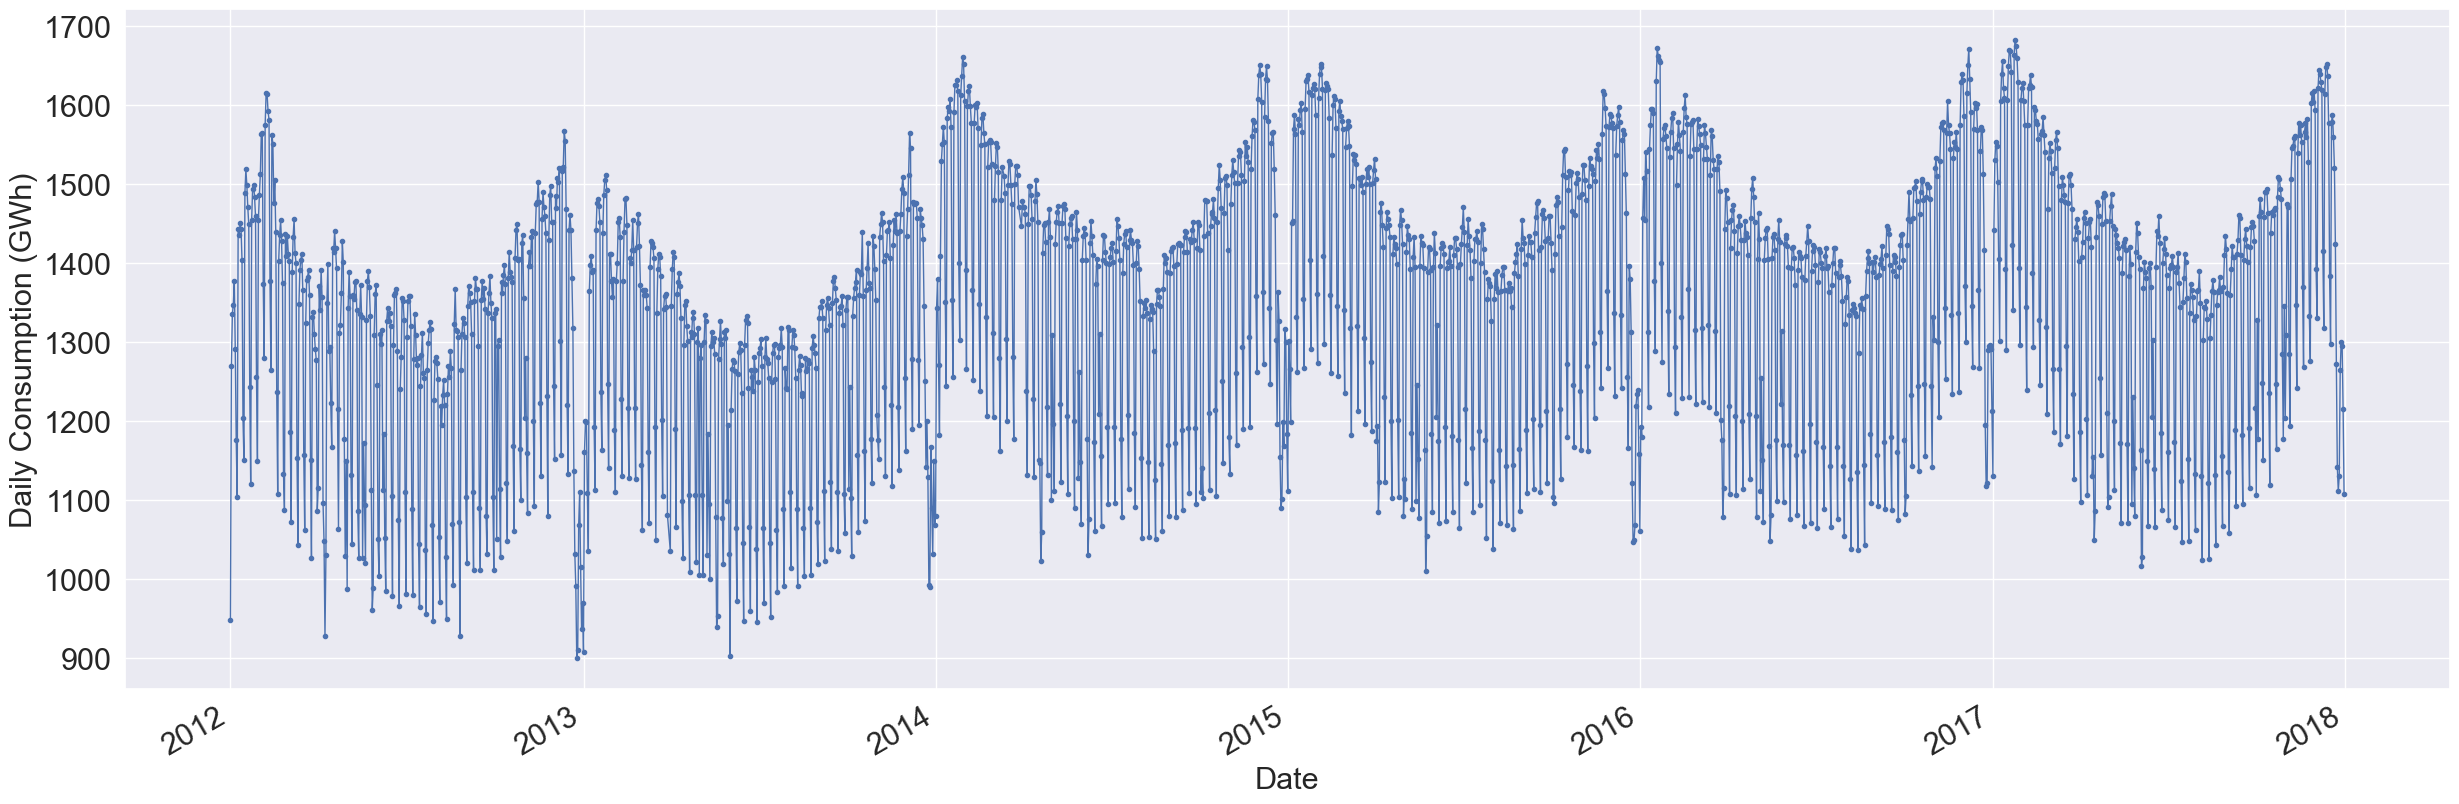

In [26]:
# Achsenbeschriftung des Plots einstellen

ax = data['Consumption'].plot(linewidth=1, marker='.');
ax.set_ylabel('Daily Consumption (GWh)');

Text(0, 0.5, 'Daily Consumption (GWh)')

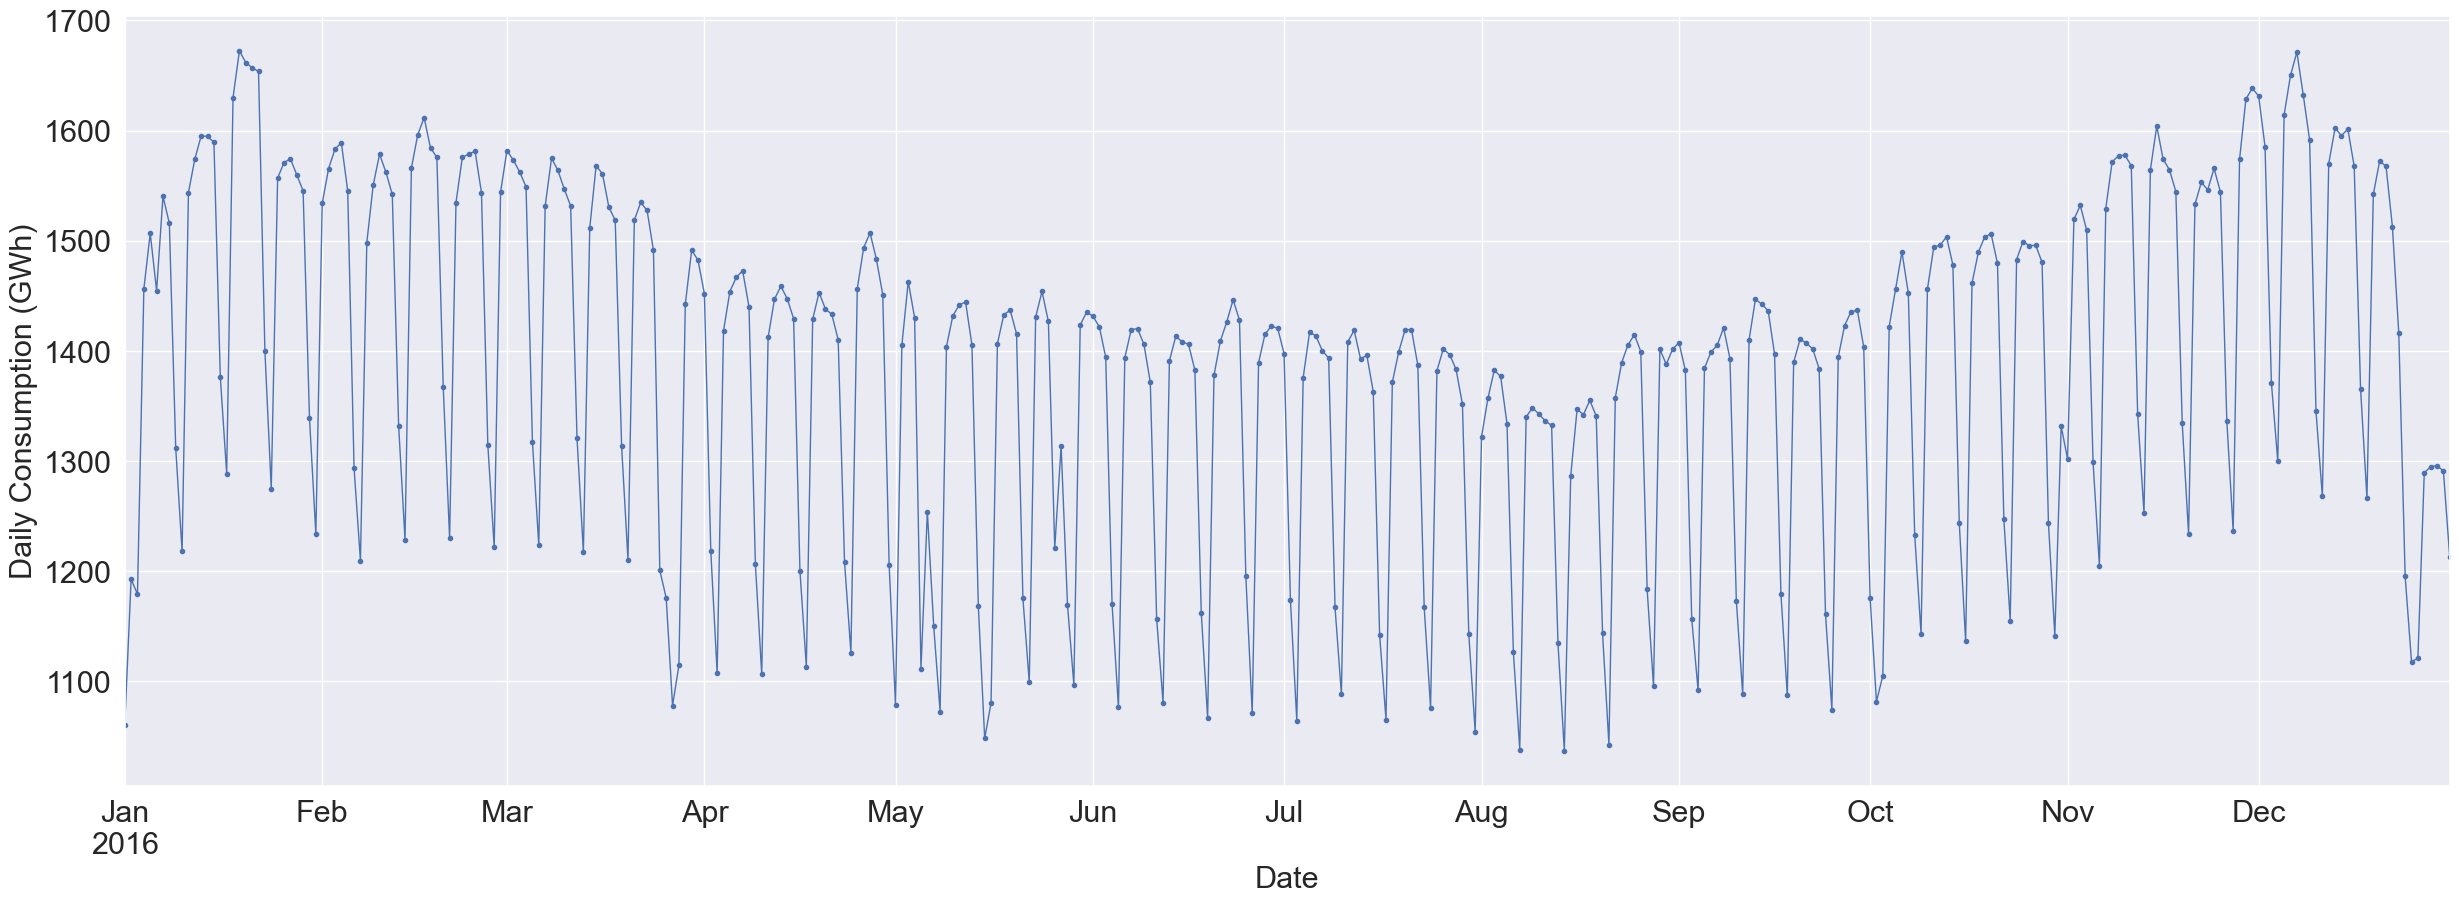

In [27]:
# Aufgabe: Erstellen Sie einen Linienplot des Stromverbrauchs im Jahr 2016
# Fügen Sie eine geeignete Achsenbeschriftung für die y-Achse hinzu
ax = data.loc['2016', 'Consumption'].plot(linewidth=1, marker='.')
ax.set_ylabel('Daily Consumption (GWh)')

Text(0, 0.5, 'Daily Production (GWh)')

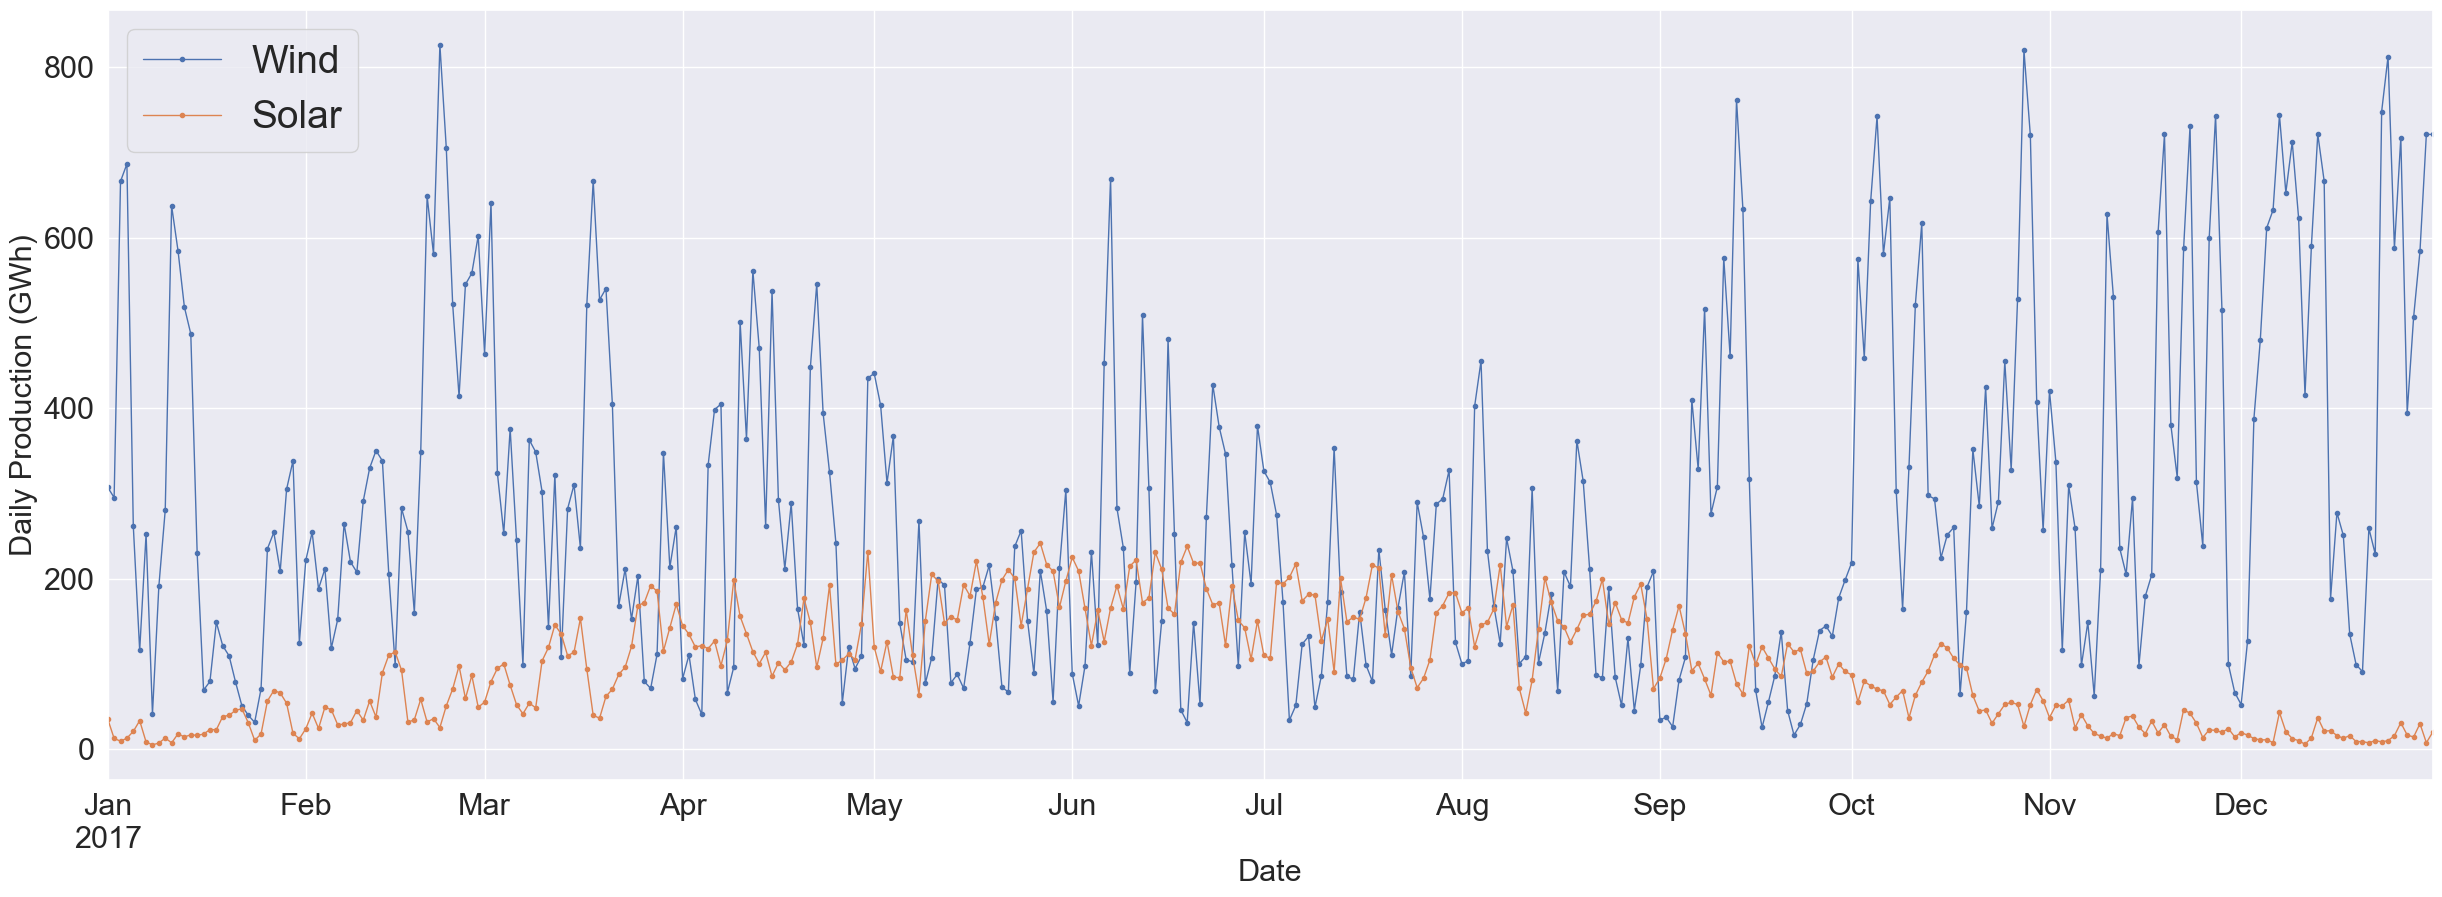

In [28]:
# Aufgabe: Plotten Sie die Stromproduktion aus Wind- und Solarenergie für das Jahr 2017 in einem Graphen
ax = data.loc['2017', ['Wind', 'Solar']].plot(linewidth=1, marker='.')
ax.set_ylabel('Daily Production (GWh)')

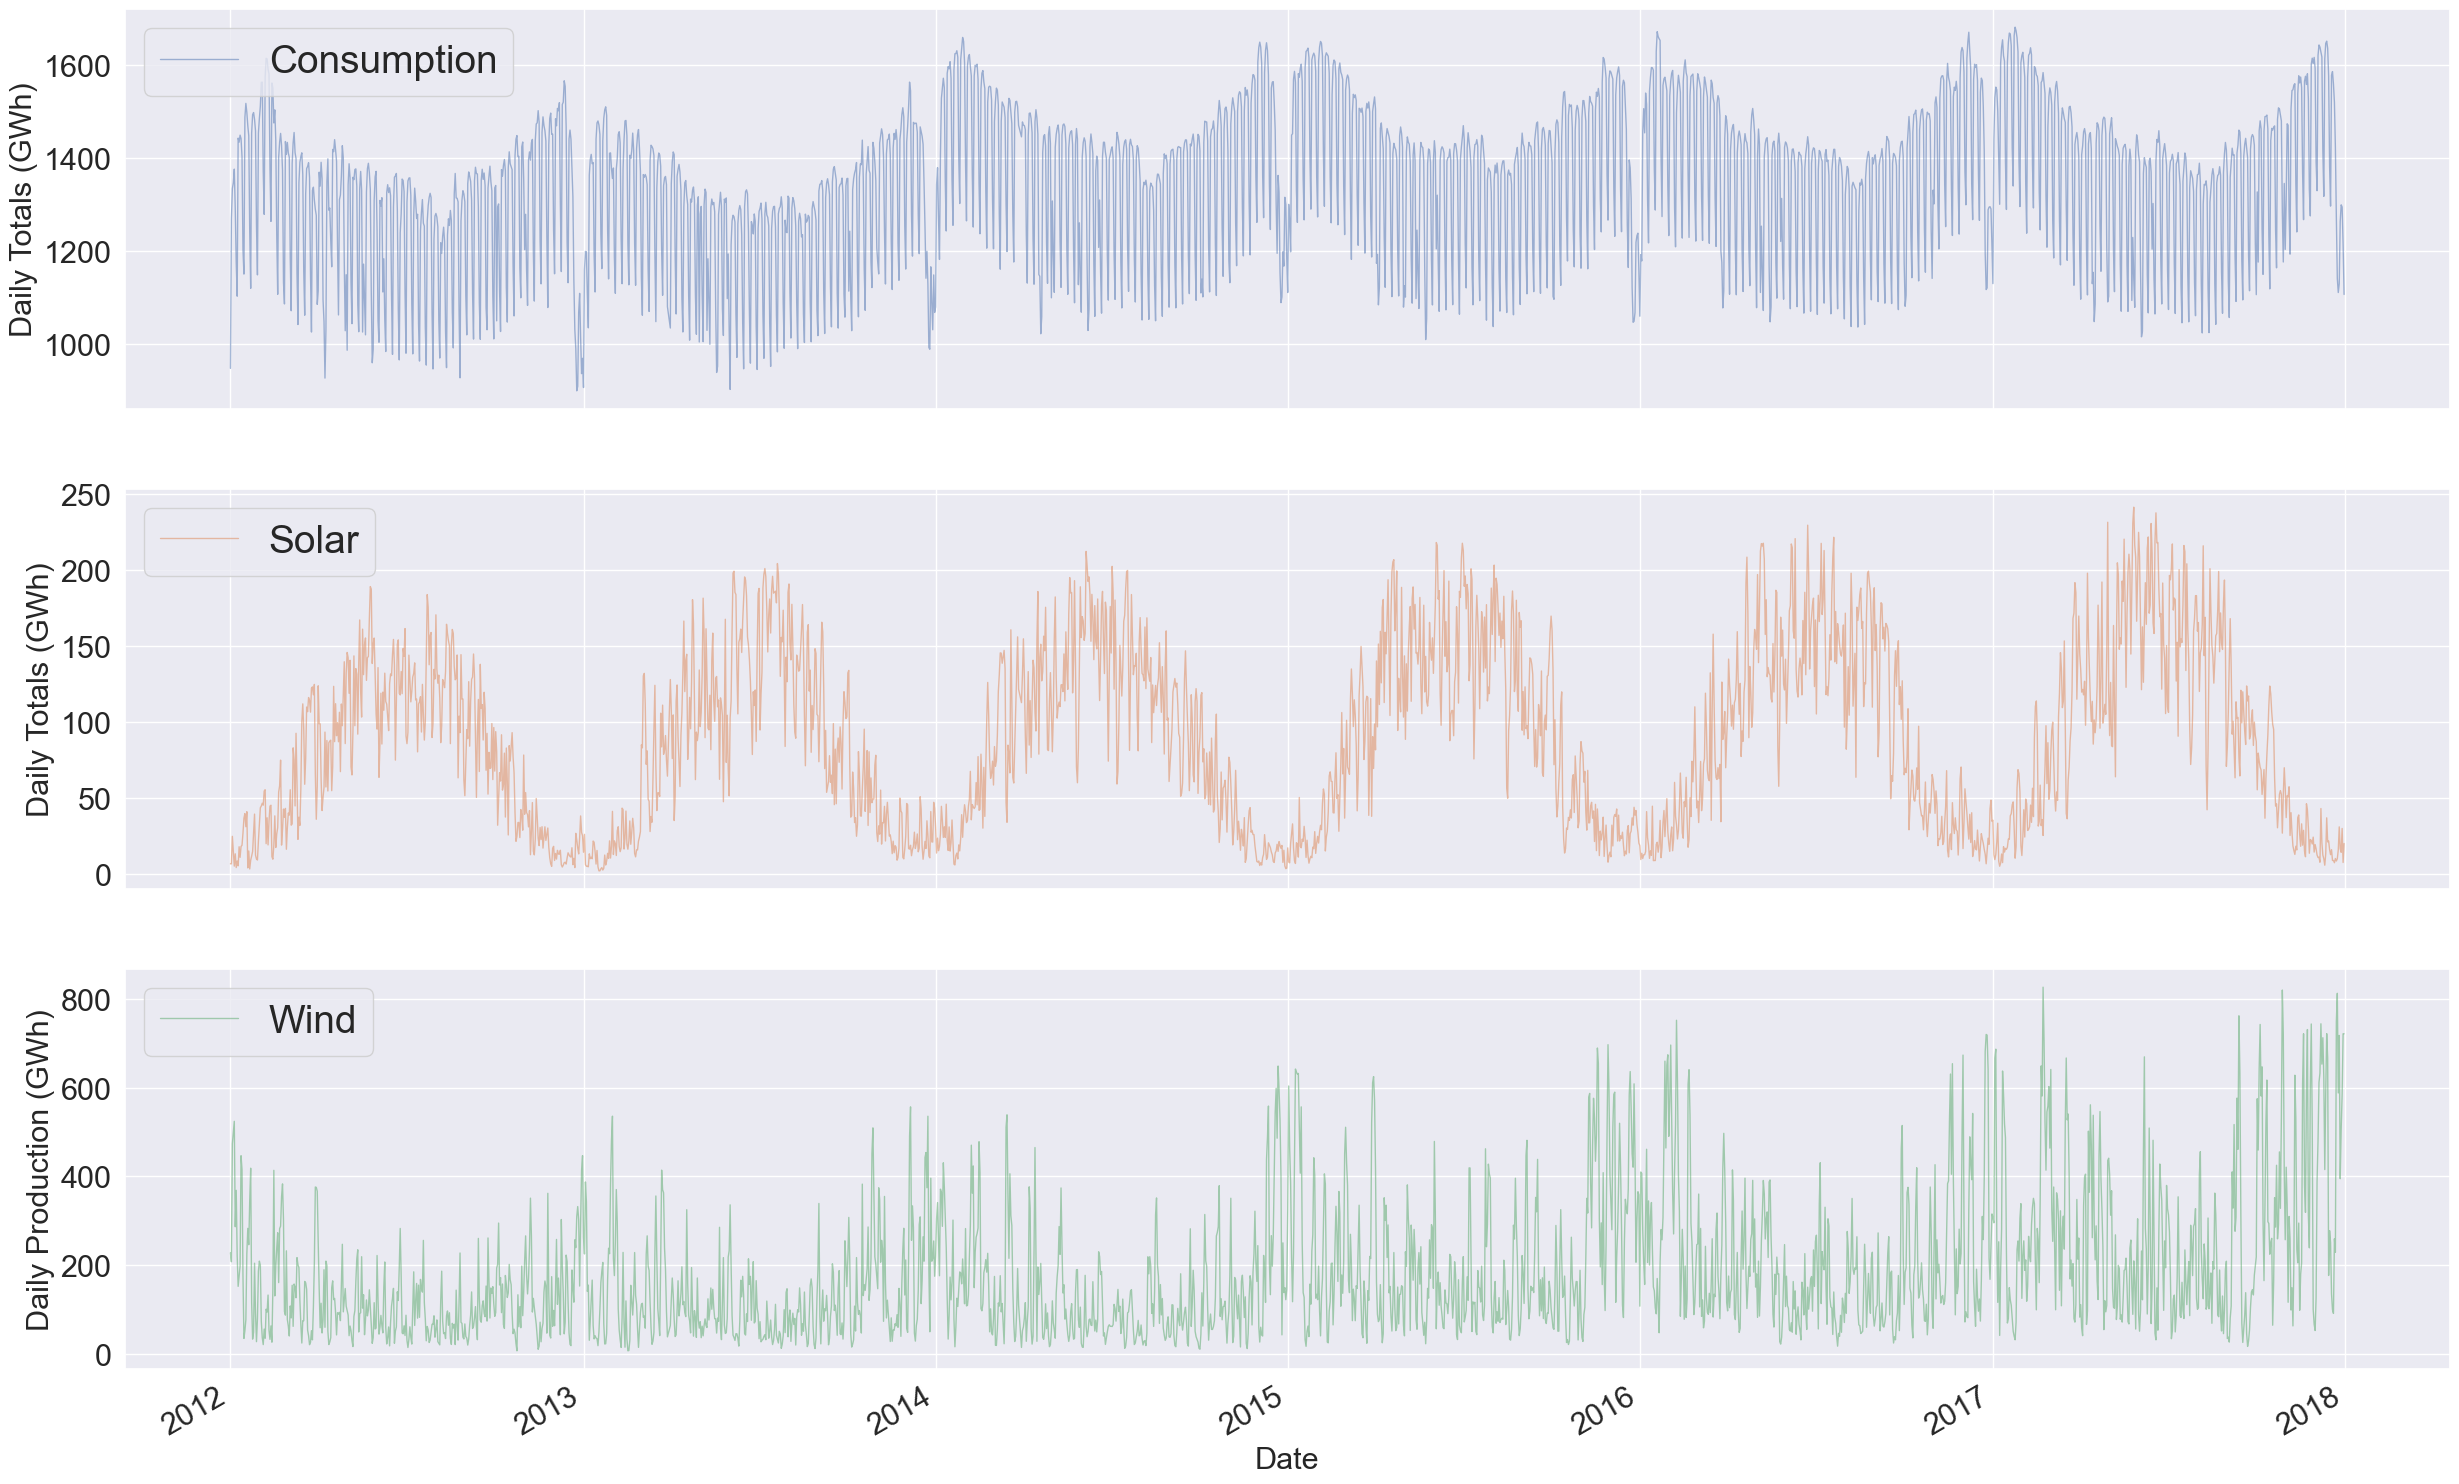

In [29]:
# Wir wollen nun die Verläufe für Verbrauch, Produktion aus Sonne, Produktion aus Wind untereinander plotten. 
# Das funktioniert so:

cols_plot = ['Consumption', 'Solar', 'Wind']
axes = data[cols_plot].plot(alpha=0.5, linewidth=1, figsize=(30, 20), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
    ax.legend(loc="upper left")
    
axes[2].set_ylabel('Daily Production (GWh)');

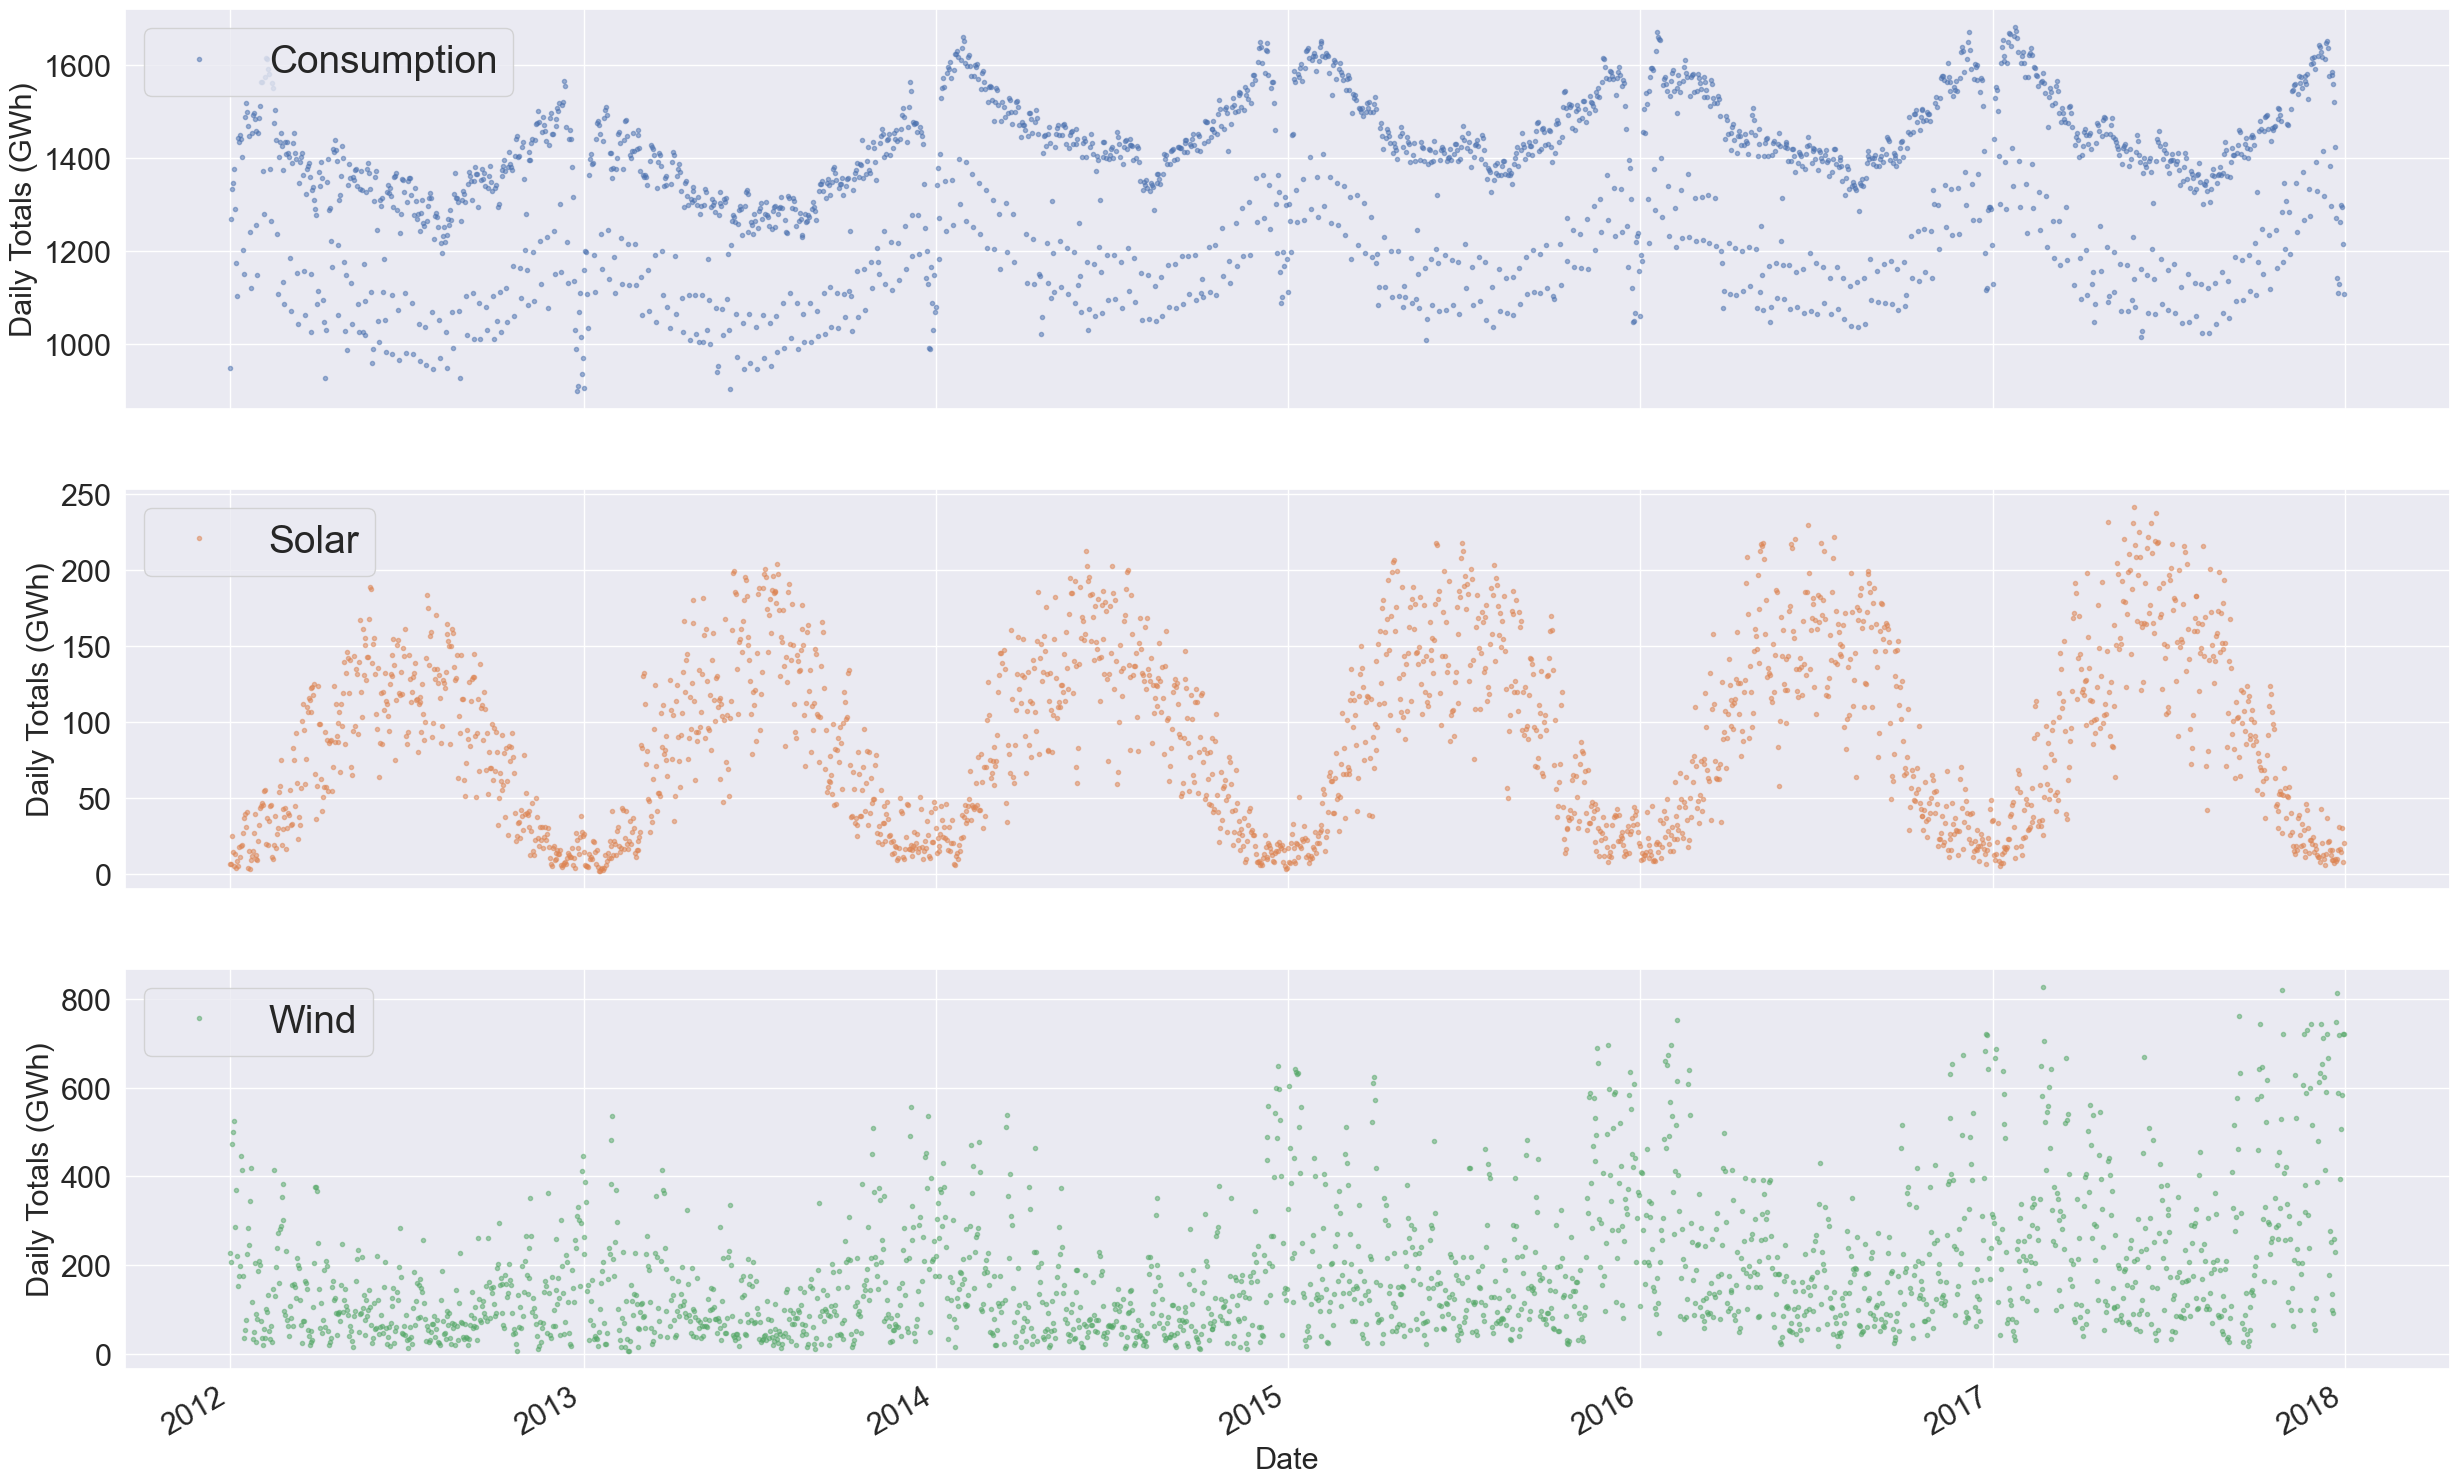

In [30]:
# Achtung: ein Linienplot kann den Eindruck verfälschen!
# Wir plotten nochmal mit Punkten als Marker und ohne Linie

axes = data[cols_plot].plot(marker='.',alpha=0.5, linestyle='', figsize=(30, 20), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
    ax.legend(loc="upper left")

Welche interessanten Muster können wir hier schon jetzt erkennen?

Antwort:
Stromverbrauch zeigt eine klare Saisonalität → höherer Verbrauch im Winter aufgrund von Heizung und Beleuchtung, niedrigerer Verbrauch im Sommer.
Solarproduktion ist im Sommer deutlich höher → längere Sonneneinstrahlung.
Windproduktion zeigt tendenziell höhere Werte im Winter → stärkere Winde im Winterhalbjahr.

## Saisonalität 
- Alle drei Zeitreihen weisen Periodizitäten auf, bei Zeitreihen auch Saisonalität genannt.
- Saisonalität: Ein Muster wiederholt sich in regelmäßigen Zeitintervallen
- Auf der jährlichen Zeitskala oszillieren Stromverbrauch, Solarenergie und Windenergie aufgrund der Jahreszeiten
- Ist auch Saisonalität auf anderen Zeitskalen zu beobachten?
- Wir untersuchen den Stromverbrauch hinsichtlich Saisonalität auf einer monatlichen Zeitskala

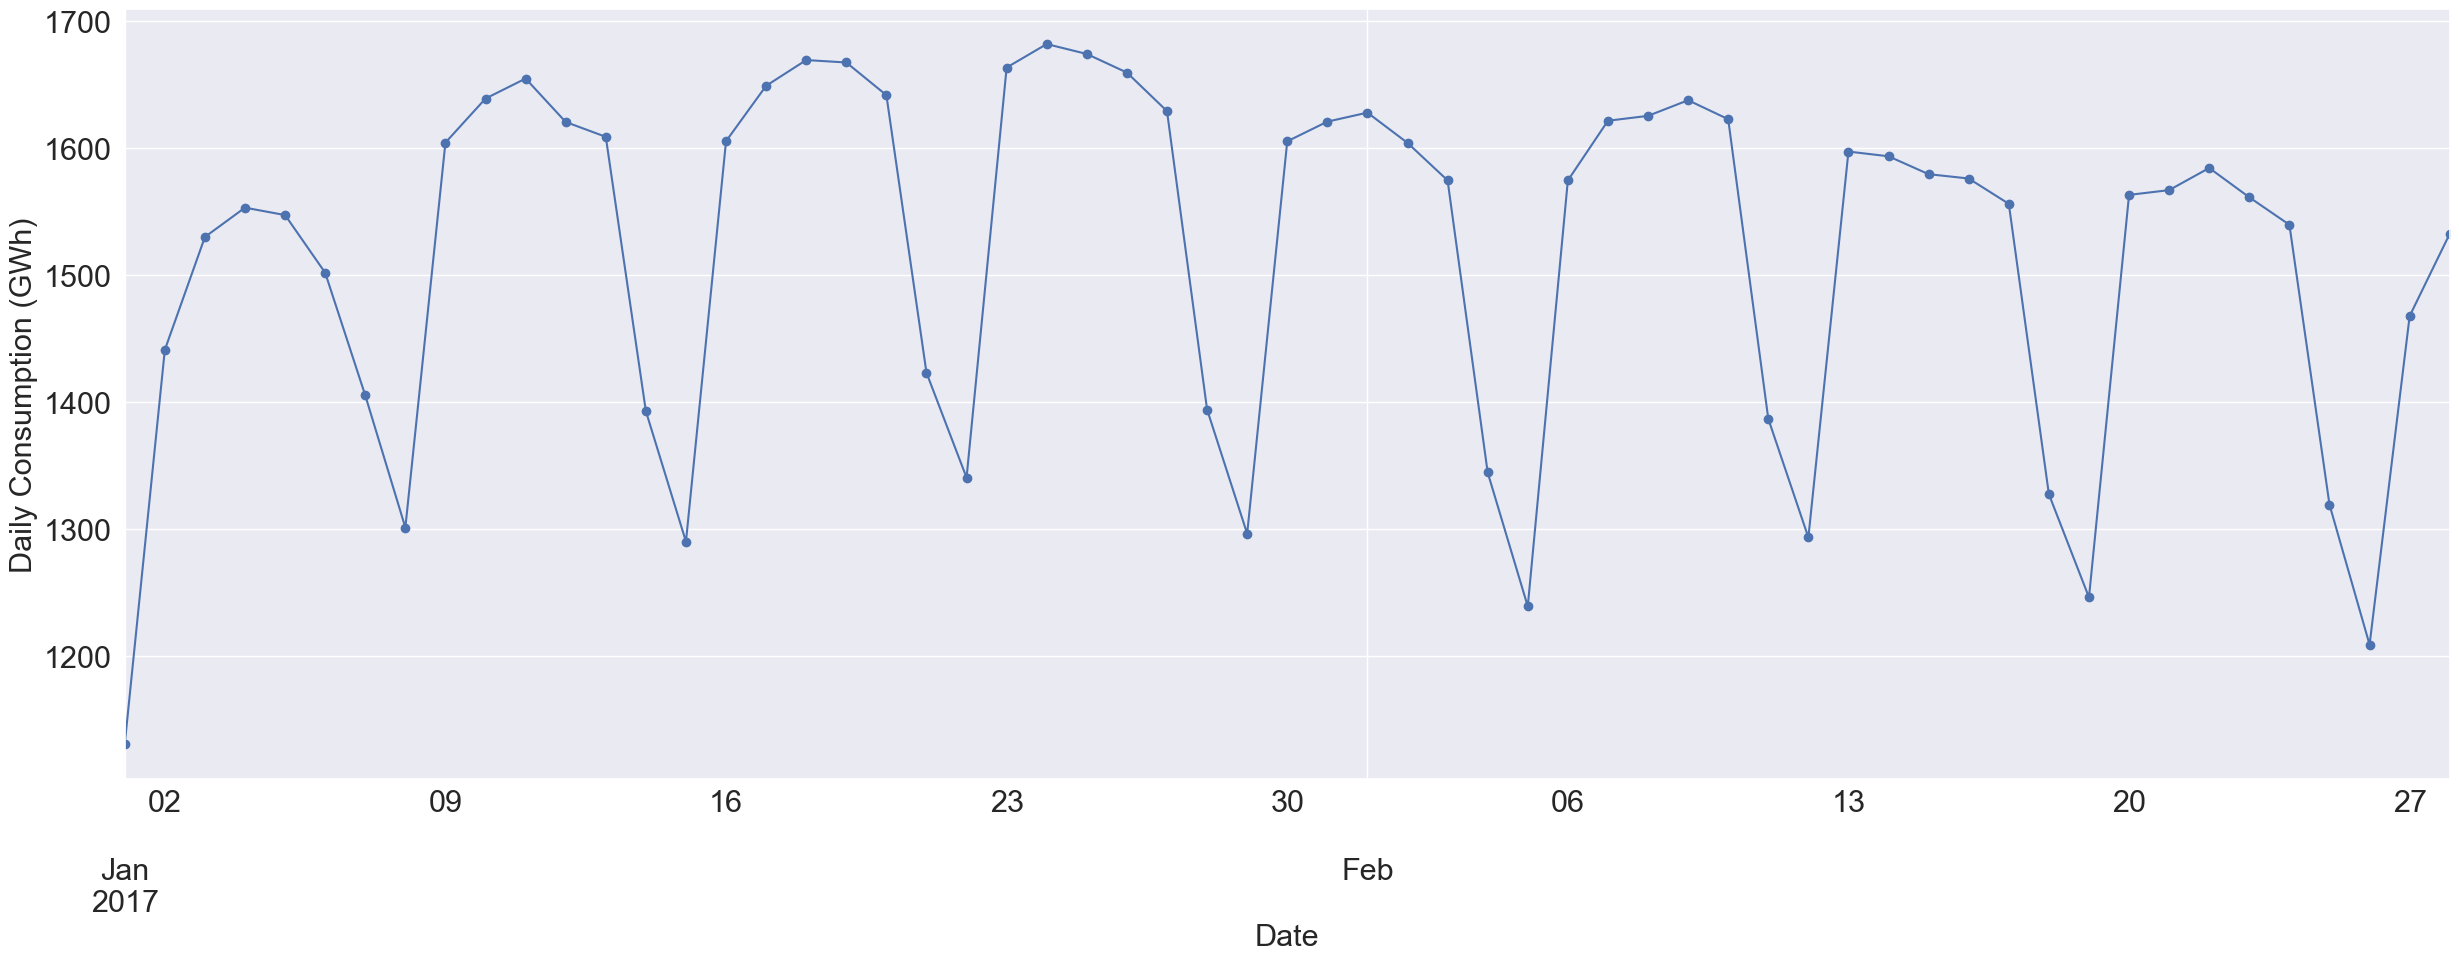

In [31]:
# Plotten Sie den Stromverbrauch für Januar und Februar 2017
ax = data.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

### Auswertung
- Stromverbrauch steigt im Winter → Heizung und Beleuchtung treiben den Verbrauch.
 - Solarproduktion steigt im Sommer → aufgrund längerer Sonneneinstrahlung.
 - Windproduktion zeigt höhere Werte im Winter → stärkere Winde im Winterhalbjahr.
 - Insgesamt zeigt sich ein saisonales Muster, das mit den klimatischen Bedingungen korreliert.

## Saisonalität mit Boxplots untersuchen

Ziel: Saisonalität näher untersuchen. Das funktioniert mit Boxplots.

In [32]:
# Als erstes fügen wir den Daten wieder eine Spalte mit dem Monat hinzu:
data['Month'] = data.index.month
data.head()

Consumption     Wind   Solar  Wind+Solar  Weekend Month Name  \
Date                                                                       
2012-01-01      948.128  227.465   6.587     234.052     True    January   
2012-01-02     1269.581  207.327   6.574     213.901    False    January   
2012-01-03     1334.745  473.468  24.679     498.147    False    January   
2012-01-04     1347.136  499.804  14.681     514.485    False    January   
2012-01-05     1376.658  523.851   5.071     528.922    False    January   

            Month  
Date               
2012-01-01      1  
2012-01-02      1  
2012-01-03      1  
2012-01-04      1  
2012-01-05      1

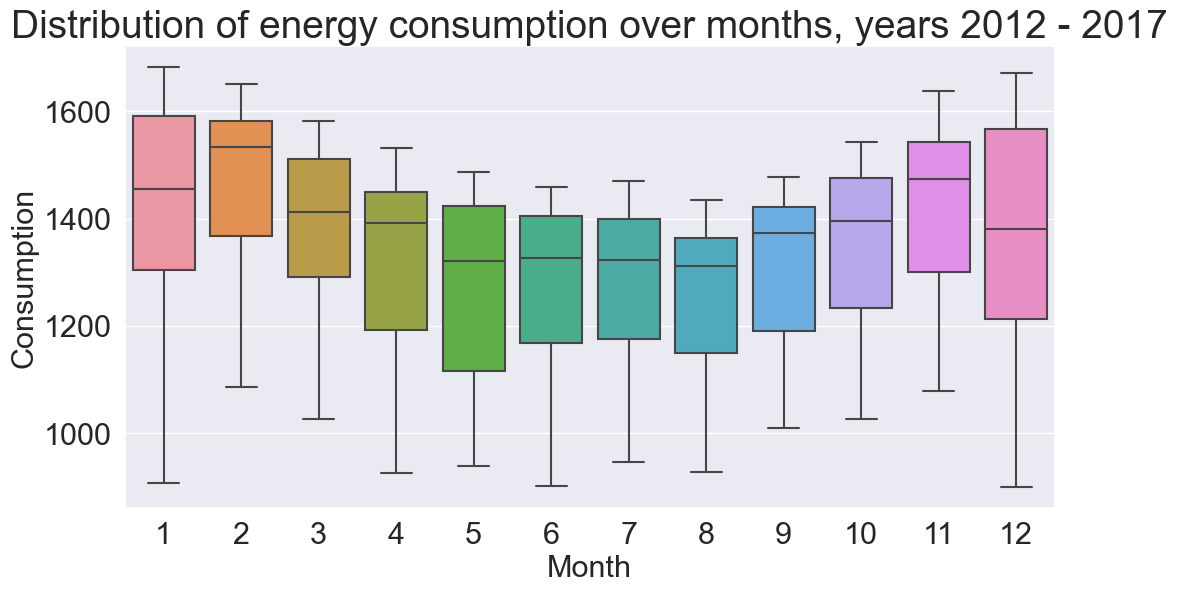

In [33]:
# Ein Boxplot kann mit der boxplot() Funktion von seaborn erstellt werden.
# wir gruppieren damit die Daten hinsichtlich unterschiedlicher Zeiträume 
# und lassen uns die Verteilungen für jede Gruppe anzeigen
# zunächst gruppieren wir die Daten monatsweise, um die jährliche Saisonalität zu untersuchen

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=data, x='Month', y='Consumption', ax=ax)
ax.set_title('Distribution of energy consumption over months, years 2012 - 2017')
fig.savefig('mehrere_boxplots.pdf')  # jetzt existiert fig!

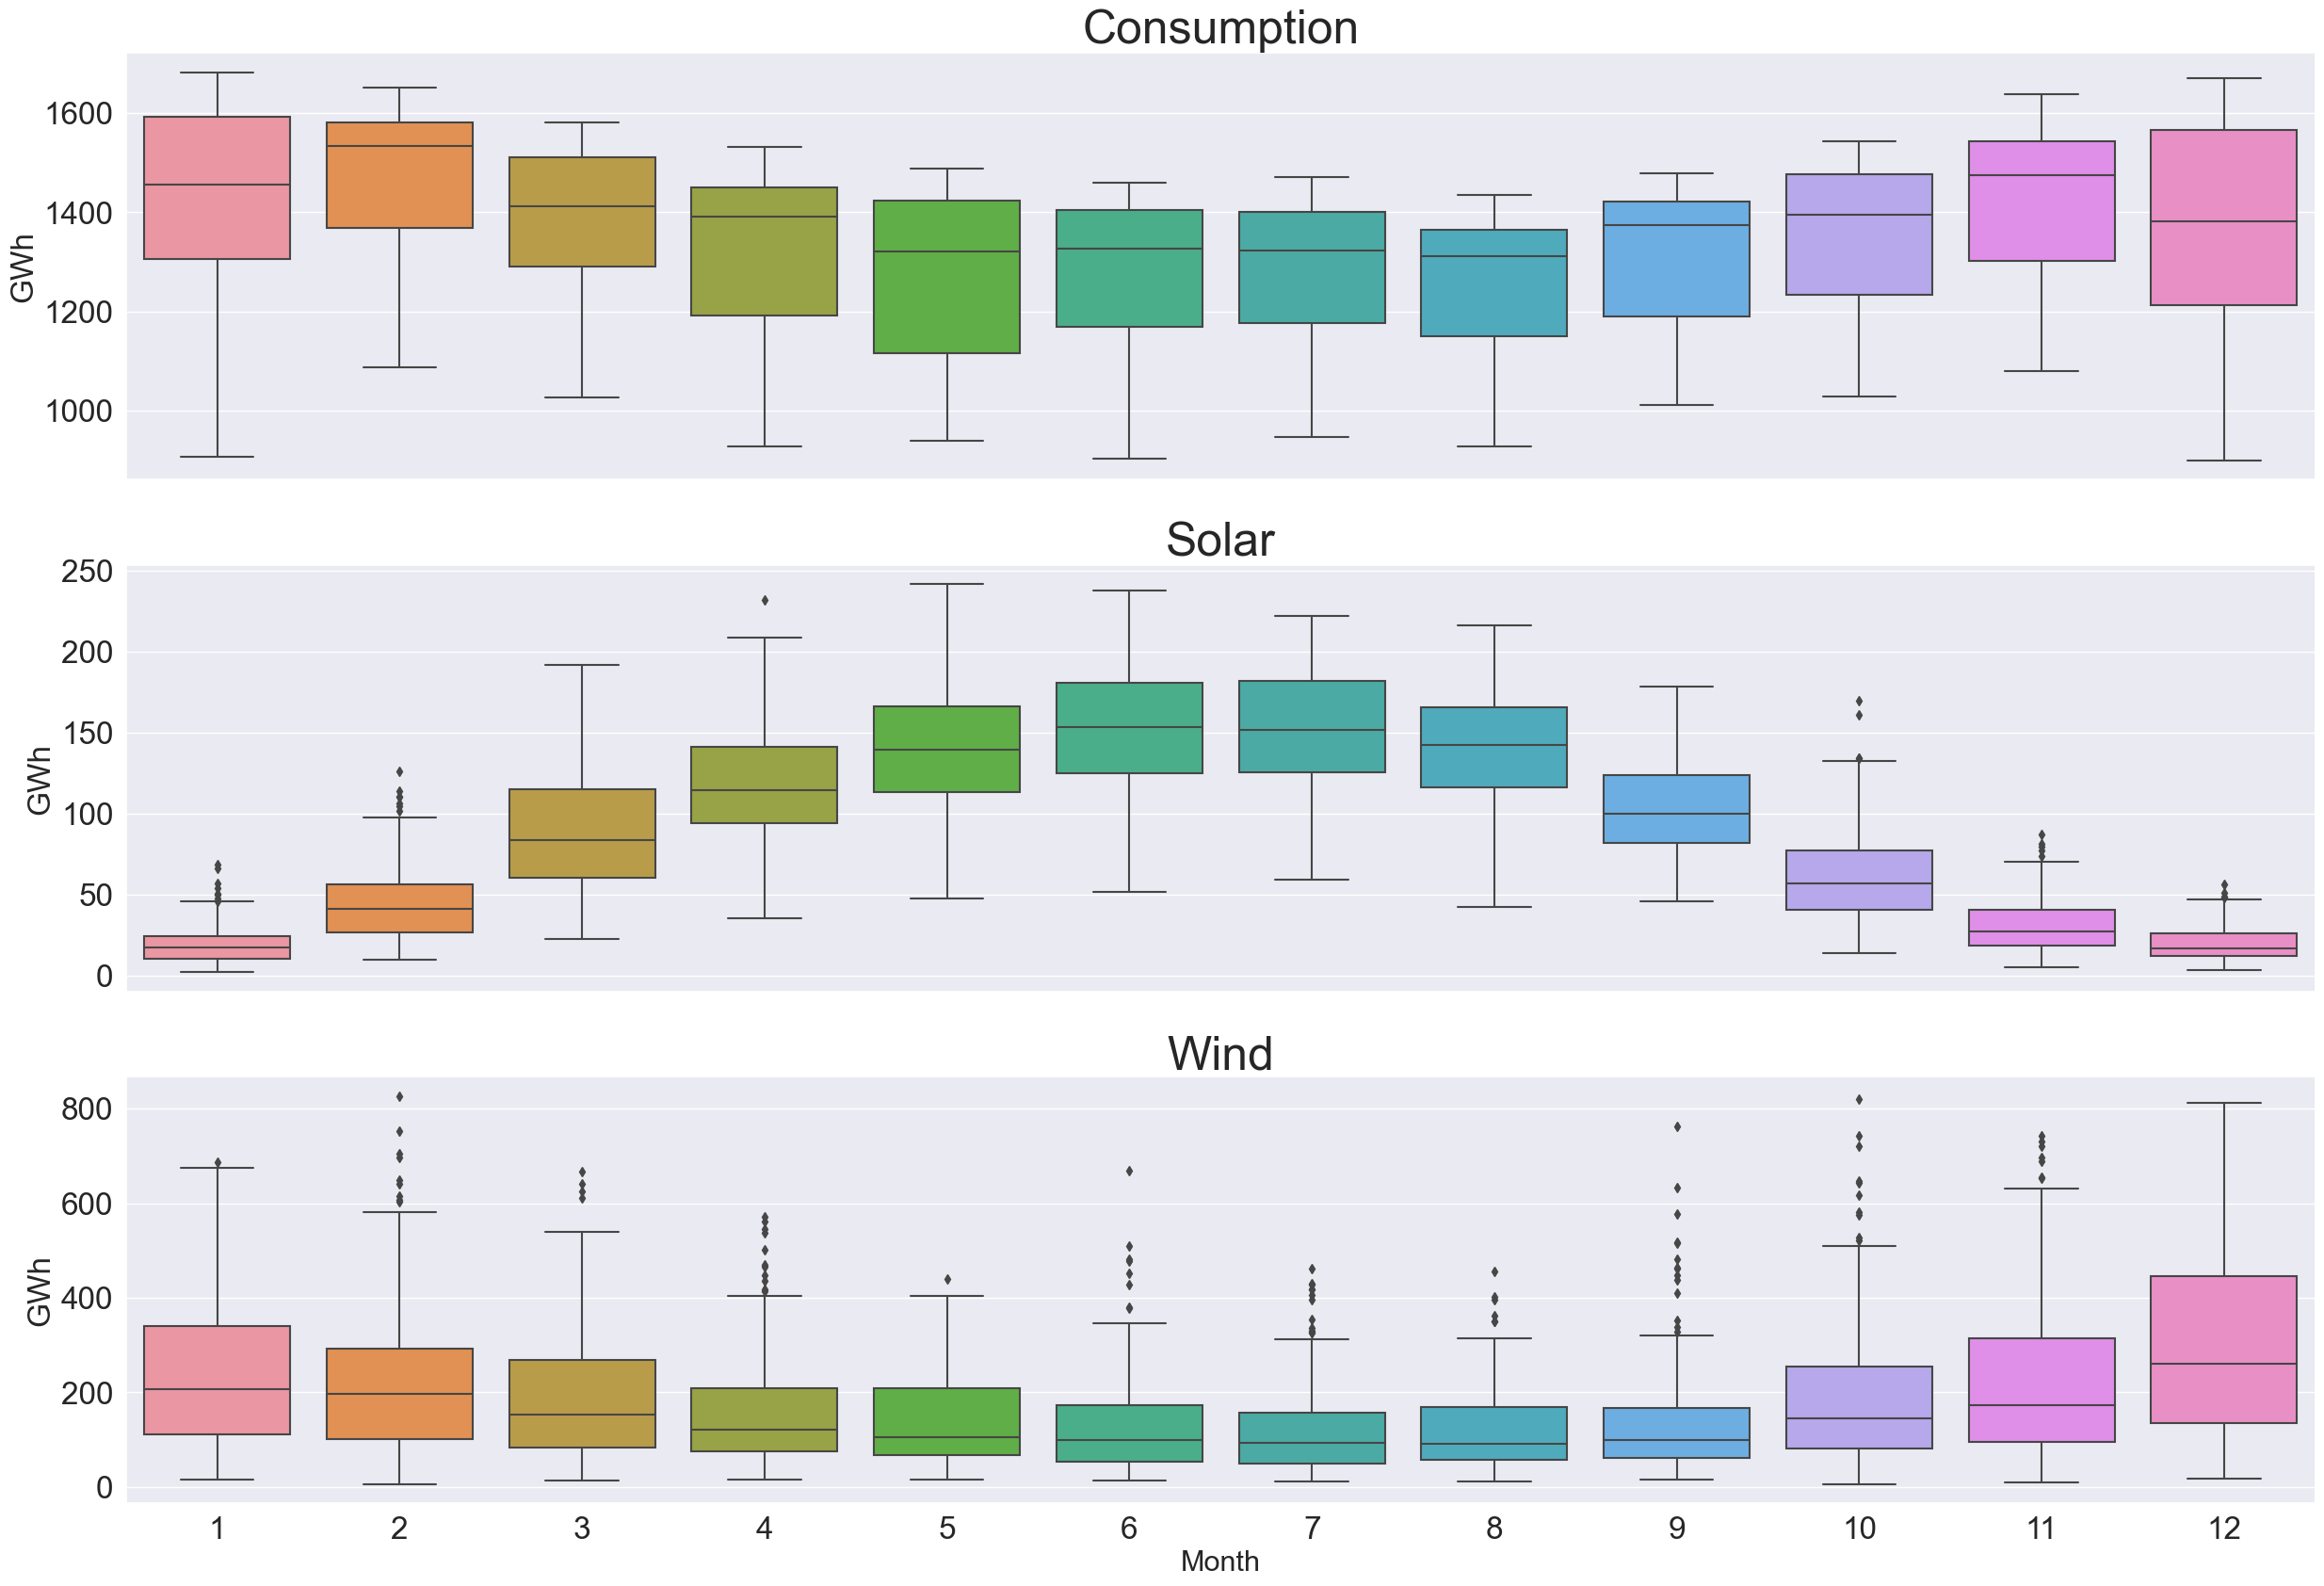

In [34]:
# Wir können auch mehrere Boxplots für die einzelnen Spalten untereinander anzeigen lassen.

fig, axes = plt.subplots(3, 1, figsize=(30, 20), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax)
    #ax.set(ylim=(0, 1800))
    ax.set_ylabel('GWh', fontsize=24)
    ax.set_title(name, fontsize=36)
    ax.tick_params(labelsize=24) #Größe der Zahlenbeschriftungen der Achsen einstellen
# Automatisch generiertes Label der x-Achse entfernen für alle Subplots außer dem untersten.
    if ax != axes[-1]:
        ax.set_xlabel('')
        
#Abstand zwischen den Subplots einstellen
plt.subplots_adjust(hspace = 0.2)

# Plot speichern
fig.savefig('mehrere_boxplots.pdf')
# files.download("mehrere_boxplots.pdf") 


## Interpretation der Boxplots
Welche Bestandteile hat ein Boxplot?
- Box = Bereich, in dem die mittleren 50% der Werte liegen (Interquartilsabstand IQR).
- Linie in der Mitte der Box = Median (50%-Wert).
- Länge der Whisker = max. 1,5 * IQR → alles außerhalb = Ausreißer.
- Punkte außerhalb der Whisker = Ausreißer.
- Symmetrische Box = keine Schiefe; verschobener Median = Schiefe der Verteilung.
- Breite der Box = Varianz der Werte → größere Box = größere Streuung.


Welche Erkenntnisse lassen sich aus den Boxplots gewinnen?
- Consumption zeigt eine klare saisonale Abhängigkeit mit einem Anstieg im Winter und einem Rückgang im Sommer.
- Solarproduktion ist im Sommer höher, im Winter niedriger → erwartbares saisonales Muster.
- Windproduktion zeigt weniger klare Muster, aber tendenziell höhere Produktion im Winter.
- Ausreißer sind erkennbar, insbesondere bei Solarproduktion im Sommer → extreme Werte durch besonders sonnige Tage.


## Grundlagen Boxplot
Was wird hier überhaupt gemacht? 
- Von den vorhandenen Jahren 2012 bis 2017 werden jeweils für einen Monat die Tagesverbräuche analysiert. Wie war der Tagesverbrauch im Januar verteilt? Wie im Februar?
- Die Box des Boxplots entspricht dem Bereich, in dem die mittleren 50 % der Daten liegen. D.h. 25% der Werte sind höher und 25% der Werte sind niedriger.
- Die Länge der Box entspricht dem Interquartilsabstand (IQR). Dieser ist ein Maß für die Streuung der Daten. Z.B. streut die Produktion von Solarenergie im Winter weniger als im Sommer. "Im Sommer gibt es gute und schlechte Tage, im Winter hauptsächlich schlechte".
- Der Median wird durch die gerade Linie in der Box dargestellt. Er teilt das Diagramm in zwei Bereiche: die unteren 50% der Werte und die oberen 50% der Werte.
- Durch die Lage des Medians innerhalb der Box bekommt man einen Eindruck von der Schiefe der den Daten zugrunde liegenden Verteilung. Ist der Median im linken Teil der Box, so ist die Verteilung rechtsschief, und umgekehrt.
- Die Antennen/Whisker stellen die außerhalb der Box liegenden Werte dar. Ihre Länge ist maximal 1.5 mal so lang wie die Länge der Box (IQR). 
- Punkte außerhalb der Whisker (Werte, die unter oder über 1.5 x IQR liegen) stellen Ausreißer dar.

## Analyseergebnisse Boxplots
- Stromverbrauch steigt im Winter → Heizungs- und Beleuchtungsbedarf höher.
- Solarproduktion ist im Sommer höher → stärkere Sonneneinstrahlung.
- Windproduktion zeigt tendenziell höhere Werte im Winter → höhere Windgeschwindigkeiten.
- Klare saisonale Muster → Energieproduktion folgt den klimatischen Bedingungen.
- Ausreißer vor allem bei Solarproduktion → extreme Werte durch außergewöhnliche Sonnenstunden.